#### **Used Libraries**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
sns.set_style("dark")
plt.rcParams["figure.figsize"] = (5, 7)
%matplotlib inline

<hr/>

#### **Data Ingestion**

In [3]:
main_df = pd.read_csv(r"D:\Anemia Classification System\Anemia Dataset.csv") 

<hr/>

#### **Exploring The Data & Cleaning**

In [4]:
# Dataset Columns
for col in main_df.columns :
    print(col)

Gender
Age
Hb
RBC
PCV
MCV
MCH
MCHC
Decision_Class


In [5]:
main_df.head(3)

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class
0,f,35,10.5,5.04,35.6,82.2,26.9,32.2,1
1,m,70,10.2,5.00,36.5,88.0,33.4,34.9,1
2,m,76,13.3,5.67,48.5,84.3,31.3,35.4,0


In [6]:
main_df.tail(3)

,Gender,Age,Hb,RBC,PCV,MCV,MCH,MCHC,Decision_Class
49997,f,59,11.4,4.56,29.0,81.2,27.0,30.1,1
49998,f,76,9.1,5.47,33.3,90.1,26.4,30.8,1
49999,f,59,10.4,3.54,42.9,78.7,28.5,30.4,1


In [7]:
# Check For Entries & Data Types 
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          50000 non-null  object 
 1   Age             50000 non-null  int64  
 2   Hb              50000 non-null  float64
 3   RBC             50000 non-null  float64
 4   PCV             50000 non-null  float64
 5   MCV             50000 non-null  float64
 6   MCH             50000 non-null  float64
 7   MCHC            50000 non-null  float64
 8   Decision_Class  50000 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 3.4+ MB


In [8]:
# Converting Traget Column ( Descision Class ) To Categorical 
main_df['Decision_Class'] = main_df['Decision_Class'].astype("object")
main_df['Decision_Class'].dtype

dtype('O')

In [9]:
# Statistics About Dataset 
print(main_df.describe())
print(" " * 50)
print(main_df.describe(include = 'object'))

                Age            Hb           RBC           PCV           MCV  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      48.914020     12.756514      4.750827     38.726146     89.027500   
std       18.150227      2.021632      0.631503      5.517929      5.883441   
min       18.000000      9.000000      3.500000     28.000000     78.000000   
25%       33.000000     11.100000      4.250000     34.300000     84.000000   
50%       49.000000     12.700000      4.760000     38.700000     89.100000   
75%       65.000000     14.300000      5.250000     43.000000     94.000000   
max       80.000000     17.000000      6.000000     50.000000    100.000000   

                MCH          MCHC  
count  50000.000000  50000.000000  
mean      28.729084     32.992564  
std        2.564751      1.527576  
min       24.000000     30.000000  
25%       26.600000     31.700000  
50%       28.700000     33.000000  
75%       30.800000     34.200000  


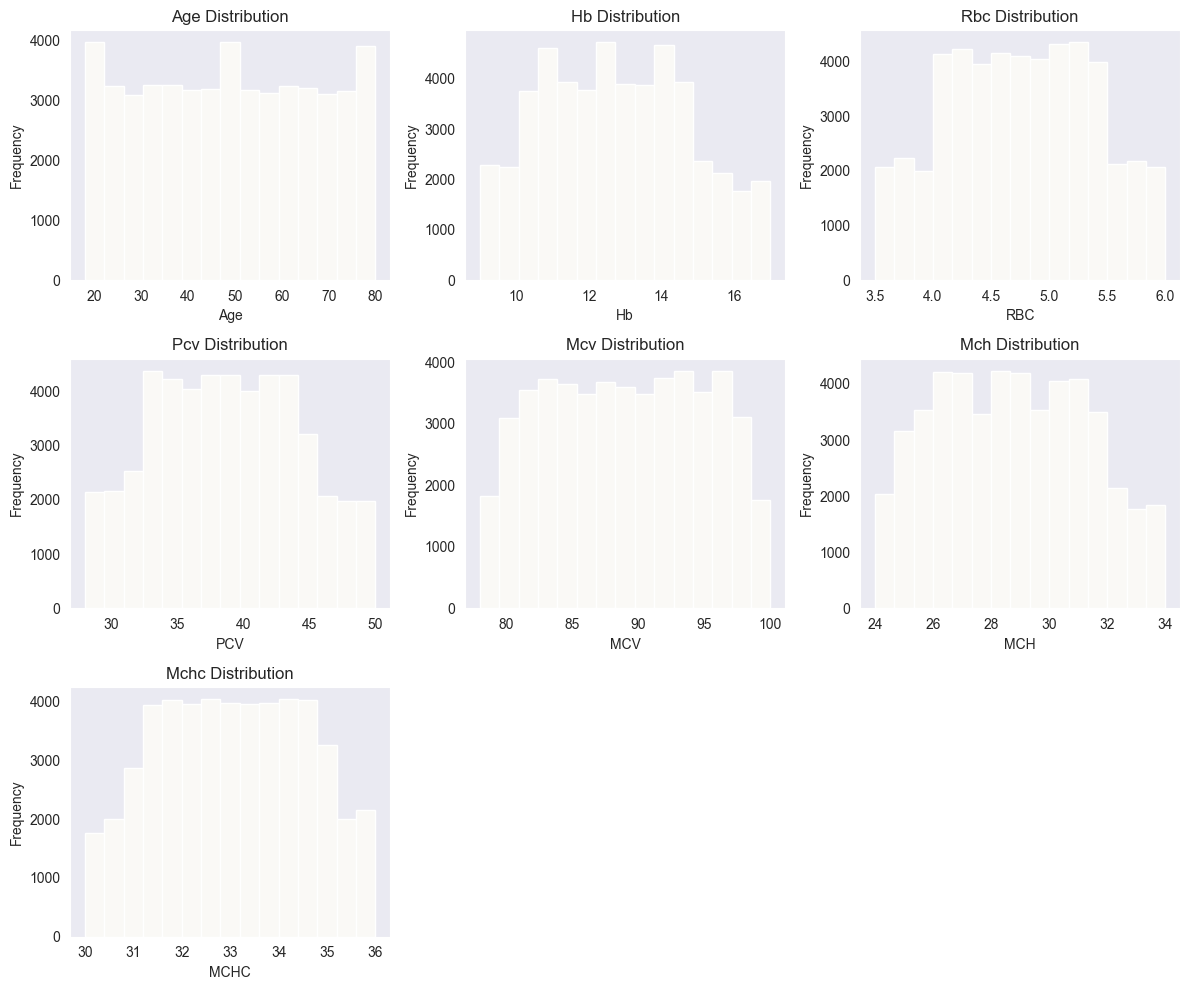

In [10]:
# Visulaize Features To Check Disribution 
numeric_features = main_df.select_dtypes("number").columns
n_cols = 3 
n_rows = math.ceil(len(numeric_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    axes[i].hist(main_df[col], bins = 15, color = '#FAF9F6')
    axes[i].set_title(f'{col.capitalize()} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

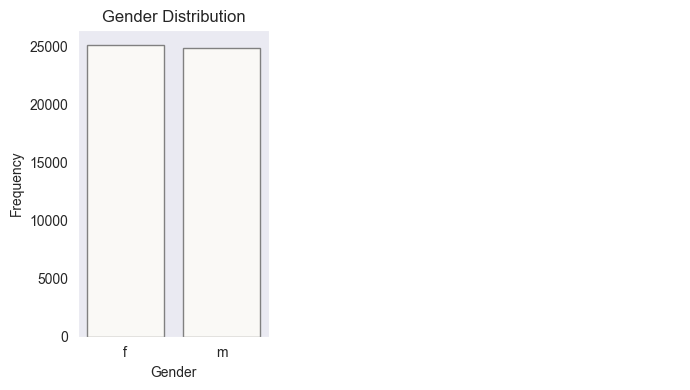

<Figure size 500x700 with 0 Axes>

In [11]:
# Check Categorical Features Values Distribution
categorical_features = main_df.select_dtypes("object").columns
n_cols = 3 
n_rows = math.ceil(len(categorical_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize = (7, 4))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    if col == 'Decision_class' :
        continue
    else :
        value_counts = main_df[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='#FAF9F6', edgecolor='gray')
        axes[i].set_title(f'{col.capitalize()} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

In [12]:
# Check Target Classes Balance
descision_class_counts = main_df['Decision_Class'].value_counts()
descision_class_percent = round((descision_class_counts / descision_class_counts.sum()) * 100, 1)

df_unique = pd.DataFrame({
    'Class': descision_class_counts.index, 
    'Count': descision_class_counts.values, 
    'Percentage': descision_class_percent.values
})

display(df_unique)

,Class,Count,Percentage
0,0,32882,65.8
1,1,17118,34.2


In [13]:
# Checking For Missing Values
main_df.isnull().sum()

Gender            0
Age               0
Hb                0
RBC               0
PCV               0
MCV               0
MCH               0
MCHC              0
Decision_Class    0
dtype: int64

In [14]:
# Checking For Duplication
main_df.duplicated().sum()

0

<hr/>

#### **Data Preparation & Preprocessing For ML**

• Numeric Features Correlation

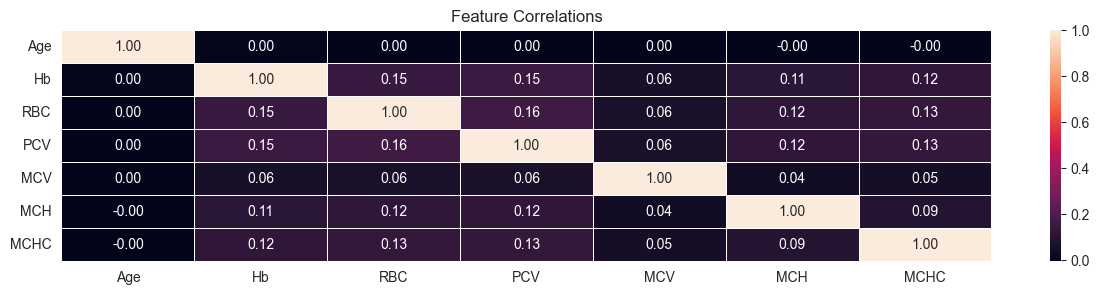

In [15]:
features_corr = main_df.select_dtypes(include = ['number']).corr()
plt.figure(figsize = (15, 3))
sns.heatmap(features_corr, annot = True, fmt = '0.2f', linewidths = 0.5)
plt.title("Feature Correlations")

plt.show()

**NOTE**</br>
From Features Correlations,</br>
It means features are independent and contribute unique information to the model.

• Data Separation 

In [16]:
features = main_df.drop("Decision_Class", axis = 1)
target = main_df["Decision_Class"]
categorical_features = main_df.select_dtypes("object").columns
numeric_features = main_df.select_dtypes("number").columns

• Data Spliting

In [17]:
training_data, temp = train_test_split(main_df, test_size = 0.3, random_state = 1)
testing_data, validating_data = train_test_split(temp, test_size = 0.15, random_state = 42)

<hr/>

#### **Feature Importance** 

• Categorical ( `Risk Ratio` ) 

In [18]:
# Risk Ratio Tabel
training_data["Decision_Class"] = training_data["Decision_Class"].astype(int)
for feature in categorical_features:
    if feature == "Decision_Class":
        continue
        
    global_mean = training_data["Decision_Class"].mean()    
    df_group = training_data.groupby(by = feature)["Decision_Class"].mean().to_frame(name = "Mean").reset_index()
    
    df_group["Difference"] = round(df_group["Mean"] - global_mean, 2)
    df_group["Risk"] = round(df_group["Mean"] / global_mean, 2)
    display(df_group)

,Gender,Mean,Difference,Risk
0,f,0.552398,0.21,1.61
1,m,0.131972,-0.21,0.38


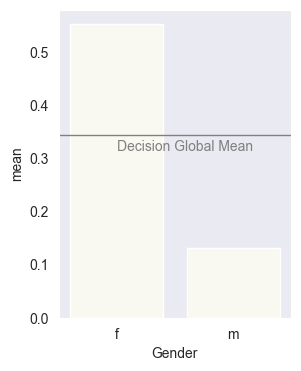

In [19]:
# Risk Ratio Chart
plt.figure(figsize = (3, 4))
for feature in categorical_features:  
    if feature == "Decision_Class" :
        continue
    df_group = training_data.groupby(by = feature).Decision_Class.agg(['mean']).reset_index()
    graph = sns.barplot(x = feature, y = 'mean', data = df_group, color = "#FAF9F0")
    graph.axhline(global_mean, linewidth = 1, color = 'gray')
    plt.text(0, global_mean - 0.03, "Decision Global Mean", color = 'gray')
    plt.show()

• Categorical ( Mutual Information )<br> 
`MI(feature;target) = Entropy(feature) - Entropy(feature|target)`

In [20]:
# Feature Importance Another Way  ( Mutual Information (MI) )

def calculate_mutual_info_score(feature):
    return mutual_info_score(training_data[feature], training_data["Decision_Class"])

categorical_features = [col for col in categorical_features if col != 'Decision_Class']
df_mi = pd.Series({feature: calculate_mutual_info_score(feature) for feature in categorical_features})

df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(round(df_mi, 3))

,MI
Gender,0.103


**NOTE**</br>
From Risk Ratio And Mutual Information Score,</br>
Gender weakly related to the target but still has some predictive power,
as it has difference in classes with descision class.

• Numeric ( Correlation Coefficient )<br> 
`Higher values of mutual information mean a higher degree of dependence`

In [21]:
numeric_features = [col for col in training_data.columns if col not in ['Decision_Class', 'Gender']]
main_df["Decision_Class"] = main_df["Decision_Class"].astype(int)
df_corr = round(training_data[numeric_features].corrwith(training_data["Decision_Class"]), 3)
display(df_corr.to_frame(name="Correlation"))

,Correlation
Age,0.002
Hb,-0.599
RBC,-0.364
PCV,-0.260
MCV,-0.079
MCH,-0.128
MCHC,-0.147


• Categorical Features & Target Correlation 

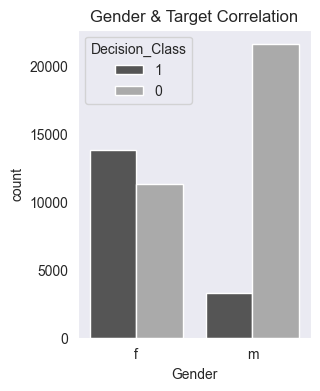

In [22]:
 main_df["Decision_Class"] = main_df["Decision_Class"].astype(str)

for col in categorical_features:
    if col == "Decision_Class":
        continue 
    else:
        if not main_df[col].dtype == "object":
            main_df[col] = main_df[col].astype(str)
            
        plt.figure(figsize = (3, 4))
        sns.countplot(data = main_df, x = col, hue = "Decision_Class", palette = "gray", dodge = True)
        plt.title(f"{col} & Target Correlation")
        plt.xticks(rotation = 0)
        plt.show()

• Features Correlation ( Numeric )

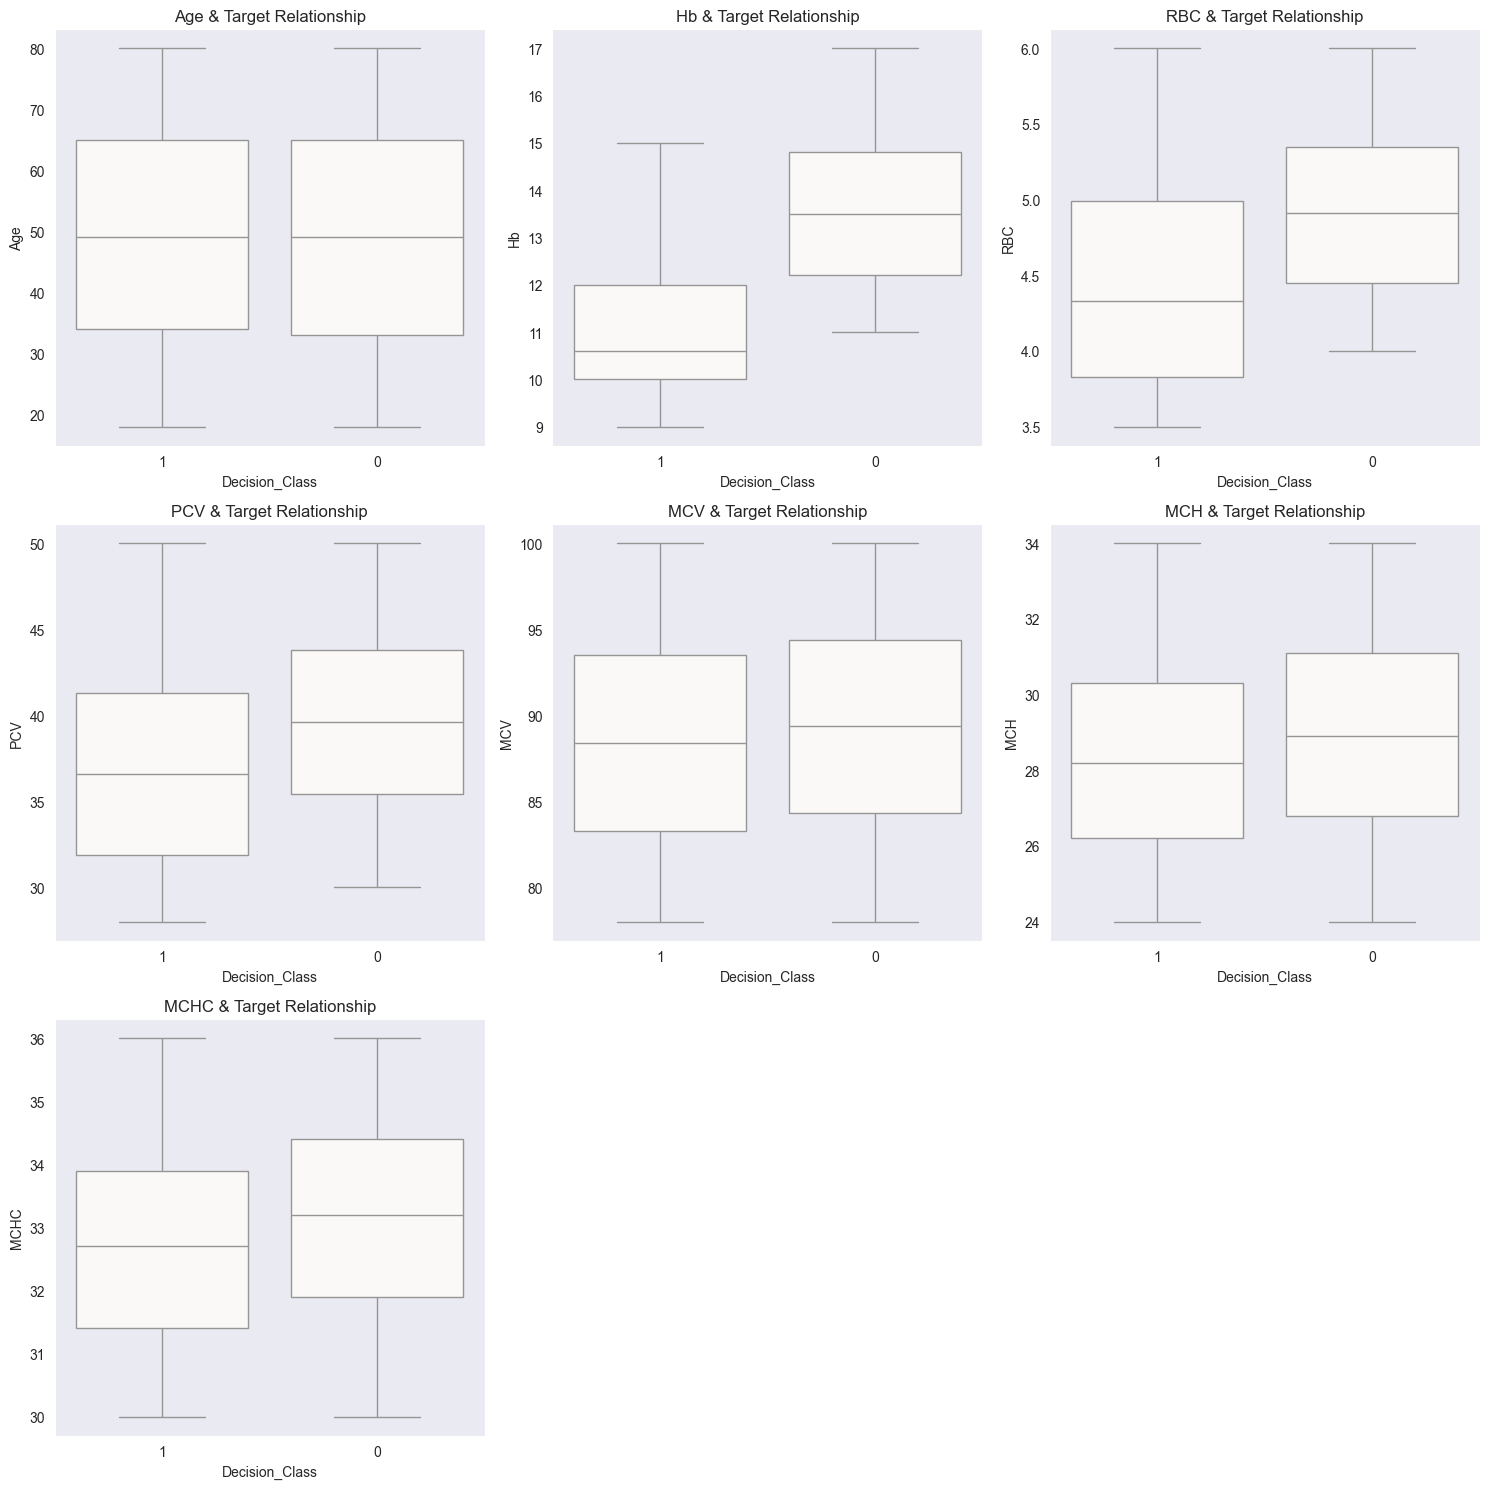

In [23]:
if len(numeric_features) > 0:
    num_cols = 3
    num_rows = -(-len(numeric_features) // num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

    axes = axes.flatten()
    for i, col in enumerate(numeric_features):
        sns.boxplot(data=main_df, x='Decision_Class', y=col, ax=axes[i], color='#FAF9F6')
        axes[i].set_title(f"{col} & Target Relationship")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

<hr/>

#### **Features Selection**

**NOTE**</br>
From Correlation Coefficient,</br>
These Feature ( **Hb - RBC - PCV** ) Are Strong Predictors & These Might Be Also Useful ( **MCH - MCHC** ) & **Gender** Is Weekly Related & **Age** Very Very Week, So We Will Drop Gender & Age

In [24]:
prepared_dataset = main_df.drop(["Age", "Gender", "MCV"], axis = 1)
prepared_dataset["Decision_Class"] = prepared_dataset["Decision_Class"].astype(int)
features = prepared_dataset.drop("Decision_Class", axis = 1)
target = prepared_dataset["Decision_Class"]
print(prepared_dataset.Decision_Class.dtype)
display(features.head(3))
display(target.head(5))

int32


,Hb,RBC,PCV,MCH,MCHC
0,10.5,5.04,35.6,26.9,32.2
1,10.2,5.00,36.5,33.4,34.9
2,13.3,5.67,48.5,31.3,35.4


0    1
1    1
2    0
3    0
4    1
Name: Decision_Class, dtype: int32

<hr/>

**Training Validation Testing Construction**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

<hr/>

#### **Features Scaling**

**NOTE**</br>
We Choose **Standardization ( Z-Score Normalization )**,</br> As Features Are Almost Normal Distribution.

In [26]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [27]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = features.columns, index = x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = features.columns, index = x_test.index)
display(x_train_scaled_df.head(3))
display(x_test_scaled_df.head(3))

,Hb,RBC,PCV,MCH,MCHC
18165,0.858272,-1.789081,-0.855057,1.077966,-0.586556
36059,0.265643,1.378618,0.395177,-0.480232,-0.521105
13242,1.796601,0.871786,-1.163086,-0.791871,0.133408


,Hb,RBC,PCV,MCH,MCHC
26247,-0.623300,-0.094362,0.974996,-1.103511,1.049725
35067,-1.462857,0.111538,-1.616069,0.415732,1.180627
34590,0.710115,0.301600,1.953440,1.623336,1.049725


#### **Model Building**<br/>
Using These Model And Choose The Best<br/>
`Logestic Regression`<br/>
`Random Forest`<br/>
`Support Vector Classifier`<br/>

In [28]:
classifiers = {
    "Random Forest" : RandomForestClassifier(),
    "Logestic Regression" : LogisticRegression(),
    "SVC" : SVC(),
}

# Cross Validation Step :
cv = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 42
)

# Evaluation :
eval_results = {}
for name, model in classifiers.items() :
    cv_scores = cross_val_score(
        model,
        x_train_scaled, y_train,
        cv = cv,
        scoring = 'accuracy',
    )
    eval_results[name] = np.mean(cv_scores)    

    print(f"{name} : {eval_results[name]:.4f}")

Random Forest : 1.0000
Logestic Regression : 0.8465
SVC : 0.9817


In [29]:
rf = RandomForestClassifier(random_state = 42)
parameters = {
    "n_estimators": [50, 100, 200], 
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(
    rf,
    param_grid = parameters,
    cv = 5,
    n_jobs = 1,
    verbose = 2
)
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [30]:
# Best Score And Parameters
print(f"Best Score {grid_search.best_score_:0.4f}")
print(f"Best Parameters {grid_search.best_params_}")

Best Score 1.0000
Best Parameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [32]:
# Unseen Data Evaluation ( Testing )
rf_best_model = grid_search.best_estimator_

prediction = rf_best_model.predict(x_test_scaled)
acc_score = accuracy_score(y_test, prediction)

print(f"Test Accuracy: {acc_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, prediction))

Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6582
           1       1.00      1.00      1.00      3418

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



#### **Model Saving**

In [36]:
with open(r"D:\Anemia Classification System/anemia_model.pkl", "wb") as model :
    pickle.dump(rf_best_model, model)